# Part 1: Data exploration and preparation

In this section we will explore available data and prepare it for future training.  
  
We have 4 different datasets with different periodicity: 1 hour periods, 15 minutes periods, 5 minute periods and single minute periods.  
  
So let's inspect our data! But first we need to do a little set up.

# Set up

In [17]:
# Basic libraries 
import numpy as np
import pandas as pd
import datetime as dt
import random
from utils import *
seed = 17
np.random.seed(seed)

# Visualization libraries
import matplotlib as mpl
import seaborn as sns

# Visualization parameters
%matplotlib notebook
mpl.rcParams['figure.figsize'] = (9, 5)
mpl.rcParams['axes.grid'] = True

# A little bit of exploration

At first let's explore 1 hour periodicity data.

In [18]:
path_fx_pr_1h = data_path + "exp-EURUSD-bars-1h-2012Jan-2020Jan.csv"
dataset = pd.read_csv(path_fx_pr_1h)
dataset.Date = pd.to_datetime(dataset.Date, format='%Y-%m-%d %H:%M:%S')
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,24831.0,1.134274e+00,0.044656,1.035600,1.107505,1.127680,1.164280,1.254900
Close,24831.0,1.134277e+00,0.044657,1.035600,1.107510,1.127670,1.164280,1.254890
High,24831.0,1.134987e+00,0.044681,1.037020,1.108045,1.128320,1.164955,1.255580
Low,24831.0,1.133587e+00,0.044626,1.034030,1.107025,1.127040,1.163600,1.254320
Volume,24831.0,6.077359e+03,4788.799718,79.000000,2711.000000,4818.000000,8042.000000,100480.000000
Spread,24831.0,4.617655e-05,0.000065,-0.000190,0.000020,0.000040,0.000050,0.001820
Simple Moving Average,24831.0,1.134268e+00,0.044633,1.038267,1.107642,1.127514,1.164353,1.252406
Fast Moving Average,24831.0,1.134274e+00,0.044643,1.037301,1.107626,1.127593,1.164360,1.253801
Slow Moving Average,24831.0,1.134267e+00,0.044617,1.038596,1.107566,1.127511,1.164380,1.252182
Bollinger Bands (Bottom),24831.0,1.131099e+00,0.044570,1.035228,1.104726,1.124829,1.161196,1.247992


## Looking for errors 

In this section we will be looking for errors in the dataset. NaNs, missing rows, extreme values.  
  
Let's look for missing rows first.

In [19]:
dataset["TD"] = dataset.Date.diff().fillna(pd.to_timedelta("0 days 00:00:00"))
dataset["WD"] = dataset.Date.apply(lambda x: dt.datetime.strftime(x, '%A'))
dataset.loc[dataset.Date.dt.weekday.between(0,5)].groupby(["TD", "WD"]).count()

Date  Open  Close  High   Low  Volume  Spread  \
TD              WD                                                         
0 days 01:00:00 Friday     4440  4440   4440  4440  4440    4440    4440   
                Monday     4953  4953   4953  4953  4953    4953    4953   
                Thursday   4987  4987   4987  4987  4987    4987    4987   
                Tuesday    4953  4953   4953  4953  4953    4953    4953   
                Wednesday  4958  4958   4958  4958  4958    4958    4958   
1 days 10:00:00 Thursday      1     1      1     1     1       1       1   
                Wednesday     2     2      2     2     2       2       2   
2 days 04:00:00 Monday        1     1      1     1     1       1       1   
2 days 07:00:00 Monday        1     1      1     1     1       1       1   
3 days 01:00:00 Monday        1     1      1     1     1       1       1   
3 days 07:00:00 Tuesday       1     1      1     1     1       1       1   

                           Simple Moving Average  Fast Moving Average  \
TD              WD                                                      
0 days 01:00:00 Friday                      4440                 4440   
                Monday                      4953                 4953   
                Thursday                    4987                 4987   
                Tuesday                     4953                 4953   
                Wednesday                   4958                 4958   
1 days 10:00:00 Thursday                       1                    1   
                Wednesday                      2                    2   
2 days 04:00:00 Monday                         1                    1   
2 days 07:00:00 Monday                         1                    1   
3 days 01:00:00 Monday                         1                    1   
3 days 07:00:00 Tuesday                        1                    1   

                           Slow Moving Average  Bollinger Bands (Bottom)  \
TD              WD                                                         
0 days 01:00:00 Friday                    4440                      4440   
                Monday                    4953                      4953   
                Thursday                  4987                      4987   
                Tuesday                   4953                      4953   
                Wednesday                 4958                      4958   
1 days 10:00:00 Thursday                     1                         1   
                Wednesday                    2                         2   
2 days 04:00:00 Monday                       1                         1   
2 days 07:00:00 Monday                       1                         1   
3 days 01:00:00 Monday                       1                         1   
3 days 07:00:00 Tuesday                      1                         1   

                           Bollinger Bands (Top)  Bollinger Bands (Main)  \
TD              WD                                                         
0 days 01:00:00 Friday                      4440                    4440   
                Monday                      4953                    4953   
                Thursday                    4987                    4987   
                Tuesday                     4953                    4953   
                Wednesday                   4958                    4958   
1 days 10:00:00 Thursday                       1                       1   
                Wednesday                      2                       2   
2 days 04:00:00 Monday                         1                       1   
2 days 07:00:00 Monday                         1                       1   
3 days 01:00:00 Monday                         1                       1   
3 days 07:00:00 Tuesday                        1                       1   

                           MACD Histogram  MACD Line  MACD Signal  Price ROC  \
TD              WD            

Huh, that's weird. We've got some places where time difference between records is more that one hour.  
Let's inspect these records.

In [20]:
dataset.loc[dataset.Date.dt.weekday.between(0,5) & (dataset.TD.dt.total_seconds() > 1*60*60)]

,Date,Open,Close,High,Low,Volume,Spread,Simple Moving Average,Fast Moving Average,Slow Moving Average,...,Bollinger Bands (Main),MACD Histogram,MACD Line,MACD Signal,Price ROC,Momentum Oscilator,VIDYA,True Range,TD,WD
3597,2016-08-01 00:00:00,1.11779,1.11725,1.11852,1.11713,4082.0,0.00006,1.114507,1.117049,1.114668,...,1.112661,0.000406,0.002640,0.002234,0.673106,100.758450,1.117279,0.00139,2 days 04:00:00,Monday
6114,2016-12-26 04:00:00,1.04487,1.04543,1.04577,1.04477,2218.0,0.00004,1.044854,1.045089,1.044825,...,1.044727,0.000031,0.000270,0.000239,-0.010521,100.146566,1.044958,0.00100,2 days 07:00:00,Monday
12346,2017-12-26 04:00:00,1.18578,1.18600,1.18639,1.18556,16456.0,0.00009,1.185014,1.185454,1.185200,...,1.185038,0.000163,-0.000139,-0.000303,0.094524,100.064966,1.184910,0.00083,3 days 07:00:00,Tuesday
12436,2018-01-01 22:00:00,1.19978,1.20039,1.20093,1.19925,7141.0,0.00074,1.199779,1.200547,1.199413,...,1.198298,0.000017,0.001838,0.001821,0.189463,100.432556,1.200754,0.00168,3 days 01:00:00,Monday
18550,2018-12-26 04:00:00,1.14095,1.14180,1.14215,1.14038,8758.0,0.00009,1.140315,1.141423,1.140578,...,1.139716,0.000406,0.000384,-0.000022,0.327748,100.230870,1.141256,0.00177,1 days 10:00:00,Wednesday
18637,2019-01-02 04:00:00,1.14514,1.14456,1.14547,1.14424,4598.0,0.00009,1.144221,1.144658,1.144376,...,1.144056,0.000077,0.000223,0.000147,0.164526,100.204864,1.144183,0.00123,1 days 10:00:00,Wednesday
24744,2019-12-26 04:00:00,1.10877,1.10863,1.10879,1.10820,3860.0,0.00002,1.108266,1.108531,1.108411,...,1.108462,0.000071,-0.000067,-0.000139,-0.010823,99.984668,1.107888,0.00059,1 days 10:00:00,Thursday


Now let's inspect these records one at a time.

In [21]:
one_hour = 1*60*60
falty_indexes = dataset.loc[dataset.Date.dt.weekday.between(0,5) & (dataset.TD.dt.total_seconds() > one_hour)].index

In [22]:
dataset.iloc[falty_indexes[0]-5:falty_indexes[0]+5][["Date", "WD", "TD"]] 

,Date,WD,TD
3592,2016-07-29 16:00:00,Friday,0 days 01:00:00
3593,2016-07-29 17:00:00,Friday,0 days 01:00:00
3594,2016-07-29 18:00:00,Friday,0 days 01:00:00
3595,2016-07-29 19:00:00,Friday,0 days 01:00:00
3596,2016-07-29 20:00:00,Friday,0 days 01:00:00
3597,2016-08-01 00:00:00,Monday,2 days 04:00:00
3598,2016-08-01 01:00:00,Monday,0 days 01:00:00
3599,2016-08-01 02:00:00,Monday,0 days 01:00:00
3600,2016-08-01 03:00:00,Monday,0 days 01:00:00
3601,2016-08-01 04:00:00,Monday,0 days 01:00:00


Okay, nothing wrong here. Seems like market has closed early on a friday evening and reopened Monday. Moving on.

In [23]:
dataset.iloc[falty_indexes[1]-5:falty_indexes[1]+5][["Date", "WD", "TD"]] 

,Date,WD,TD
6109,2016-12-23 17:00:00,Friday,0 days 01:00:00
6110,2016-12-23 18:00:00,Friday,0 days 01:00:00
6111,2016-12-23 19:00:00,Friday,0 days 01:00:00
6112,2016-12-23 20:00:00,Friday,0 days 01:00:00
6113,2016-12-23 21:00:00,Friday,0 days 01:00:00
6114,2016-12-26 04:00:00,Monday,2 days 07:00:00
6115,2016-12-26 05:00:00,Monday,0 days 01:00:00
6116,2016-12-26 06:00:00,Monday,0 days 01:00:00
6117,2016-12-26 07:00:00,Monday,0 days 01:00:00
6118,2016-12-26 08:00:00,Monday,0 days 01:00:00


Same here.

In [24]:
dataset.iloc[falty_indexes[2]-5:falty_indexes[2]+5][["Date", "WD", "TD"]] 

,Date,WD,TD
12341,2017-12-22 17:00:00,Friday,0 days 01:00:00
12342,2017-12-22 18:00:00,Friday,0 days 01:00:00
12343,2017-12-22 19:00:00,Friday,0 days 01:00:00
12344,2017-12-22 20:00:00,Friday,0 days 01:00:00
12345,2017-12-22 21:00:00,Friday,0 days 01:00:00
12346,2017-12-26 04:00:00,Tuesday,3 days 07:00:00
12347,2017-12-26 05:00:00,Tuesday,0 days 01:00:00
12348,2017-12-26 06:00:00,Tuesday,0 days 01:00:00
12349,2017-12-26 07:00:00,Tuesday,0 days 01:00:00
12350,2017-12-26 08:00:00,Tuesday,0 days 01:00:00


Here we can see that market has reopened on Tuesday because 25-th was Christmas.

In [25]:
dataset.iloc[falty_indexes[3]-5:falty_indexes[3]+5][["Date", "WD", "TD"]] 

,Date,WD,TD
12431,2017-12-29 17:00:00,Friday,0 days 01:00:00
12432,2017-12-29 18:00:00,Friday,0 days 01:00:00
12433,2017-12-29 19:00:00,Friday,0 days 01:00:00
12434,2017-12-29 20:00:00,Friday,0 days 01:00:00
12435,2017-12-29 21:00:00,Friday,0 days 01:00:00
12436,2018-01-01 22:00:00,Monday,3 days 01:00:00
12437,2018-01-01 23:00:00,Monday,0 days 01:00:00
12438,2018-01-02 00:00:00,Tuesday,0 days 01:00:00
12439,2018-01-02 01:00:00,Tuesday,0 days 01:00:00
12440,2018-01-02 02:00:00,Tuesday,0 days 01:00:00


It was New Year celebration so the market opened later than it used to.

In [26]:
dataset.iloc[falty_indexes[4]-5:falty_indexes[4]+5][["Date", "WD", "TD"]] 

,Date,WD,TD
18545,2018-12-24 14:00:00,Monday,0 days 01:00:00
18546,2018-12-24 15:00:00,Monday,0 days 01:00:00
18547,2018-12-24 16:00:00,Monday,0 days 01:00:00
18548,2018-12-24 17:00:00,Monday,0 days 01:00:00
18549,2018-12-24 18:00:00,Monday,0 days 01:00:00
18550,2018-12-26 04:00:00,Wednesday,1 days 10:00:00
18551,2018-12-26 05:00:00,Wednesday,0 days 01:00:00
18552,2018-12-26 06:00:00,Wednesday,0 days 01:00:00
18553,2018-12-26 07:00:00,Wednesday,0 days 01:00:00
18554,2018-12-26 08:00:00,Wednesday,0 days 01:00:00


Christmas.

In [27]:
dataset.iloc[falty_indexes[5]-5:falty_indexes[5]+5][["Date", "WD", "TD"]] 

,Date,WD,TD
18632,2018-12-31 14:00:00,Monday,0 days 01:00:00
18633,2018-12-31 15:00:00,Monday,0 days 01:00:00
18634,2018-12-31 16:00:00,Monday,0 days 01:00:00
18635,2018-12-31 17:00:00,Monday,0 days 01:00:00
18636,2018-12-31 18:00:00,Monday,0 days 01:00:00
18637,2019-01-02 04:00:00,Wednesday,1 days 10:00:00
18638,2019-01-02 05:00:00,Wednesday,0 days 01:00:00
18639,2019-01-02 06:00:00,Wednesday,0 days 01:00:00
18640,2019-01-02 07:00:00,Wednesday,0 days 01:00:00
18641,2019-01-02 08:00:00,Wednesday,0 days 01:00:00


New Year.

In [28]:
dataset.iloc[falty_indexes[6]-5:falty_indexes[6]+5][["Date", "WD", "TD"]] 

,Date,WD,TD
24739,2019-12-24 14:00:00,Tuesday,0 days 01:00:00
24740,2019-12-24 15:00:00,Tuesday,0 days 01:00:00
24741,2019-12-24 16:00:00,Tuesday,0 days 01:00:00
24742,2019-12-24 17:00:00,Tuesday,0 days 01:00:00
24743,2019-12-24 18:00:00,Tuesday,0 days 01:00:00
24744,2019-12-26 04:00:00,Thursday,1 days 10:00:00
24745,2019-12-26 05:00:00,Thursday,0 days 01:00:00
24746,2019-12-26 06:00:00,Thursday,0 days 01:00:00
24747,2019-12-26 07:00:00,Thursday,0 days 01:00:00
24748,2019-12-26 08:00:00,Thursday,0 days 01:00:00


And Christmas. 

OK, that's it then, no anomalies here, let's check for NaNs and move on.

In [29]:
dataset.isnull().values.any()

False

Judging by this dataset, we can ignore extreme gaps in data which happen on holidays and weekends, that's good to know.

In [30]:
holiday_dates = ("01-01", "01-02", "12-26")

I, personally, see no point in checking each and every error since I can't see how we will be able to manage these types of errors.  
So, before we dive head first into every error in each dataset, I suggest we just inspect the biggest one and see what types of errors we have at our hands.

## Inspecting 1 minute periodicity dataset 

I know I just said that we're gonna inspect only the 1 minute periodicity dataset, but let's upload every single dataset at once to save us some hassle.

In [31]:
path_to_1h = data_path + "exp-EURUSD-bars-1h-2012Jan-2020Jun.csv"
path_to_15min = data_path + "exp-EURUSD-bars-m15-2014Jan-2020Jun.csv"
path_to_5min = data_path + "exp-EURUSD-bars-m5-2014Jan-2020Jun.csv"
path_to_1min = data_path + "exp-EURUSD-bars-1m-2014Jan-2020Jun.csv"

data_1h = upload_df(path_to_1h)
data_15m = upload_df(path_to_15min)
data_5m = upload_df(path_to_5min)
data_1m = upload_df(path_to_1min)

Now let's talk about the amount of data at our hands. Basically we have datasets beginning from 2014-2016 and ending in 2020. Let's cut our datasets so we would only have data from 2016 to 2020.

In [32]:
data_1h = data_1h.loc[(data_1h.Date.dt.year >= 2016) & (data_1m.Date.dt.year < 2020)].reset_index(drop=True)
data_15m = data_15m.loc[(data_15m.Date.dt.year >= 2016) & (data_1m.Date.dt.year < 2020)].reset_index(drop=True)
data_5m = data_5m.loc[(data_5m.Date.dt.year >= 2016) & (data_1m.Date.dt.year < 2020)].reset_index(drop=True)
data_1m = data_1m.loc[(data_1m.Date.dt.year >= 2016) & (data_1m.Date.dt.year < 2020)].reset_index(drop=True)

Now let's explore `data_1m` dataset.

In [33]:
data_1m.shape

(1479279, 22)

Oof, that's a lot of data.

In [34]:
data_1m["TD"] = data_1m.Date.diff().fillna(pd.to_timedelta("0 days 00:00:00"))
data_1m["WD"] = data_1m.Date.apply(lambda x: dt.datetime.strftime(x, '%A'))
data_1m.loc[data_1m.Date.dt.weekday.between(0,5) & (data_1m.TD.dt.total_seconds() > 61)\
            & ~(data_1m.Date.dt.strftime('%m-%d').isin(holiday_dates))].groupby(["TD", "WD"]).count()

Date  Ask  Bid  Spread  Open  Close  High  Low  \
TD              WD                                                          
0 days 00:02:00 Friday      381  381  381     381   381    381   381  381   
                Monday      832  832  832     832   832    832   832  832   
                Thursday    645  645  645     645   645    645   645  645   
                Tuesday     681  681  681     681   681    681   681  681   
                Wednesday   559  559  559     559   559    559   559  559   
0 days 00:03:00 Friday       34   34   34      34    34     34    34   34   
                Monday       92   92   92      92    92     92    92   92   
                Thursday     74   74   74      74    74     74    74   74   
                Tuesday      76   76   76      76    76     76    76   76   
                Wednesday    62   62   62      62    62     62    62   62   
0 days 00:04:00 Friday       10   10   10      10    10     10    10   10   
                Monday       24   24   24      24    24     24    24   24   
                Thursday     18   18   18      18    18     18    18   18   
                Tuesday      11   11   11      11    11     11    11   11   
                Wednesday     9    9    9       9     9      9     9    9   
0 days 00:05:00 Friday        2    2    2       2     2      2     2    2   
                Monday        7    7    7       7     7      7     7    7   
                Thursday      3    3    3       3     3      3     3    3   
                Tuesday       2    2    2       2     2      2     2    2   
0 days 00:06:00 Friday        3    3    3       3     3      3     3    3   
                Monday      209  209  209     209   209    209   209  209   
                Thursday    213  213  213     213   213    213   213  213   
                Tuesday     208  208  208     208   208    208   208  208   
                Wednesday   208  208  208     208   208    208   208  208   
0 days 00:07:00 Friday        1    1    1       1     1      1     1    1   
                Monday        3    3    3       3     3      3     3    3   
                Wednesday     2    2    2       2     2      2     2    2   
0 days 00:08:00 Monday        2    2    2       2     2      2     2    2   
                Wednesday     1    1    1       1     1      1     1    1   
0 days 00:10:00 Friday        1    1    1       1     1      1     1    1   
                Wednesday     1    1    1       1     1      1     1    1   
0 days 00:29:00 Tuesday       1    1    1       1     1      1     1    1   
0 days 00:52:00 Wednesday     1    1    1       1     1      1     1    1   
2 days 03:01:00 Monday        1    1    1       1     1      1     1    1   

                           Volume  Simple Moving Average  ...  \
TD              WD                                        ...   
0 days 00:02:00 Friday        381                    381  ...   
                Monday        832                    832  ...   
                Thursday      645                    645  ...   
                Tuesday       681                    681  ...   
                Wednesday     559                    559  ...   
0 days 00:03:00 Friday         34                     34  ...   
                Monday         92                     92  ...   
                Thursday       74                     74  ...   
                Tuesday        76                     76  ...   
                Wednesday      62                     62  ...   
0 days 00:04:00 Friday         10                     10  ...   
                Monday         24                     24  ...   
                Thursday       18                     18  ...   
                Tuesday        11                     11  ...   
                Wednesday       9                      9  ...   
0 days 00:05:00 Friday          2                      2  ...   
                Monday          7                      7  ...   
                Thu

In [35]:
falty_indexes = data_1m.loc[data_1m.Date.dt.weekday.between(0,5) & (data_1m.TD.dt.total_seconds() > 61)\
                & ~(data_1m.Date.dt.strftime('%m-%d').isin(holiday_dates))].sort_values("TD").index
falty_indexes.shape

(4377,)

In [36]:
data_1m.loc[falty_indexes]

,Date,Ask,Bid,Spread,Open,Close,High,Low,Volume,Simple Moving Average,...,Bollinger Bands (Main),MACD Histogram,MACD Line,MACD Signal,Price ROC,Momentum Oscilator,VIDYA,True Range,TD,WD
1233623,2019-05-01 03:34:00,1.12187,1.12182,0.00005,1.12183,1.12182,1.12185,1.12182,23.0,1.121854,...,1.121871,-0.000019,0.000018,0.000037,-0.008913,99.991087,1.121838,0.00004,0 days 00:02:00,Wednesday
1318833,2019-07-23 23:26:00,1.11518,1.11512,0.00006,1.11512,1.11513,1.11513,1.11512,7.0,1.115076,...,1.115093,0.000009,-0.000017,-0.000026,0.003587,100.003587,1.115075,0.00002,0 days 00:02:00,Tuesday
1318851,2019-07-23 23:45:00,1.11503,1.11500,0.00003,1.11501,1.11499,1.11503,1.11499,11.0,1.115043,...,1.115062,-0.000005,-0.000030,-0.000024,-0.009865,99.990135,1.115008,0.00004,0 days 00:02:00,Tuesday
1318861,2019-07-23 23:56:00,1.11518,1.11516,0.00002,1.11515,1.11515,1.11515,1.11514,4.0,1.115058,...,1.115049,0.000018,0.000013,-0.000005,0.013453,100.013453,1.115104,0.00001,0 days 00:02:00,Tuesday
1318863,2019-07-23 23:59:00,1.11513,1.11510,0.00003,1.11515,1.11510,1.11515,1.11510,10.0,1.115074,...,1.115053,0.000013,0.000016,0.000003,0.009866,100.008969,1.115113,0.00005,0 days 00:02:00,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362189,2019-09-04 09:27:00,1.10099,1.10097,0.00002,1.10129,1.10127,1.10130,1.10123,72.0,1.101103,...,1.100936,-0.000025,0.000345,0.000371,0.029066,100.064513,1.101192,0.00007,0 days 00:10:00,Wednesday
790412,2018-02-16 07:46:00,1.25326,1.25322,0.00004,1.25368,1.25358,1.25373,1.25356,184.0,1.253586,...,1.253622,0.000015,-0.000068,-0.000082,0.028726,99.994416,1.253575,0.00017,0 days 00:10:00,Friday
15990,2016-01-19 02:06:00,1.08852,1.08843,0.00009,1.08833,1.08833,1.08833,1.08833,2.0,1.088433,...,1.088467,-0.000008,-0.000040,-0.000032,0.000919,99.997244,1.088465,0.00010,0 days 00:29:00,Tuesday
125063,2016-05-04 06:46:00,1.14929,1.14923,0.00006,1.14857,1.14850,1.14859,1.14850,27.0,1.148742,...,1.148862,-0.000050,-0.000099,-0.000049,-0.046126,99.954744,1.148568,0.00009,0 days 00:52:00,Wednesday


So basically we have A LOT of missing rows. Let's try to fill at least some of them in.  
Let's look into the last three missing data cases.

In [37]:
data_1m.iloc[falty_indexes[-1]-5:falty_indexes[-1] +5][["Date", "WD", "TD"]] 

,Date,WD,TD
214791,2016-07-29 20:55:00,Friday,0 days 00:01:00
214792,2016-07-29 20:56:00,Friday,0 days 00:01:00
214793,2016-07-29 20:57:00,Friday,0 days 00:01:00
214794,2016-07-29 20:58:00,Friday,0 days 00:01:00
214795,2016-07-29 20:59:00,Friday,0 days 00:01:00
214796,2016-08-01 00:00:00,Monday,2 days 03:01:00
214797,2016-08-01 00:01:00,Monday,0 days 00:01:00
214798,2016-08-01 00:02:00,Monday,0 days 00:01:00
214799,2016-08-01 00:03:00,Monday,0 days 00:01:00
214800,2016-08-01 00:04:00,Monday,0 days 00:01:00


Nothing wrong here, just beginning of a new week.

In [38]:
data_1m.iloc[falty_indexes[-2]-5:falty_indexes[-2] +5][["Date", "WD", "TD"]] 

,Date,WD,TD
125058,2016-05-04 05:50:00,Wednesday,00:01:00
125059,2016-05-04 05:51:00,Wednesday,00:01:00
125060,2016-05-04 05:52:00,Wednesday,00:01:00
125061,2016-05-04 05:53:00,Wednesday,00:01:00
125062,2016-05-04 05:54:00,Wednesday,00:01:00
125063,2016-05-04 06:46:00,Wednesday,00:52:00
125064,2016-05-04 06:47:00,Wednesday,00:01:00
125065,2016-05-04 06:48:00,Wednesday,00:01:00
125066,2016-05-04 06:49:00,Wednesday,00:01:00
125067,2016-05-04 06:50:00,Wednesday,00:01:00


Hm, that's a bit weird. We've got almost an hour of data missing. I guess we'll just add missing rows with zeros.

In [39]:
data_1m.iloc[falty_indexes[-3]-5:falty_indexes[-3] +5][["Date", "WD", "TD"]]

,Date,WD,TD
15985,2016-01-19 01:31:00,Tuesday,00:01:00
15986,2016-01-19 01:32:00,Tuesday,00:01:00
15987,2016-01-19 01:33:00,Tuesday,00:01:00
15988,2016-01-19 01:34:00,Tuesday,00:01:00
15989,2016-01-19 01:37:00,Tuesday,00:03:00
15990,2016-01-19 02:06:00,Tuesday,00:29:00
15991,2016-01-19 02:07:00,Tuesday,00:01:00
15992,2016-01-19 02:08:00,Tuesday,00:01:00
15993,2016-01-19 02:09:00,Tuesday,00:01:00
15994,2016-01-19 02:10:00,Tuesday,00:01:00


That's weird, but no biggie. Let's get to correction.

Basically we have 2 types of missing data at our hands:  
1. Absence of data due to markets being closed (holidays, weekends). This type of error should not be corrected as it's a natural cause;   
  
2. Absence of data due to no particular reason. This type of error must be corrected by either filling missing rows with zeros or interpolation.  
  
That said, let's start by adding missing rows to our dataset.  

In [40]:
idx = pd.date_range(data_1m.iloc[0].Date, data_1m.iloc[-1].Date, freq="min")
data_1m.index = pd.DatetimeIndex(data_1m.Date)
data_1m = data_1m.reindex(idx)
data_1m.Date = data_1m.index
data_1m.index = np.arange(data_1m.shape[0])
data_1m.shape

(2099335, 24)

Great. Now we need to delete empty rows, if there are more than 60 of them consecutively.

In [41]:
length = 60 
zeros_mask = data_1m.Ask.isnull()
m = ~(data_1m.groupby(zeros_mask.ne(zeros_mask.shift()).cumsum().values).Ask.transform('size').gt(length) & zeros_mask)

In [42]:
data_1m = data_1m[m].reset_index(drop=True)
data_1m.shape

(1488889, 24)

Great! Now, that that's done we can fill in remaining empty rows using `interpolate` function.

In [43]:
data_1m = data_1m.interpolate('linear', axis=0)

And now to verify results.

In [44]:
data_1m["TD"] = data_1m.Date.diff().fillna(pd.to_timedelta("0 days 00:00:00"))
data_1m["WD"] = data_1m.Date.apply(lambda x: dt.datetime.strftime(x, '%A'))
data_1m.loc[data_1m.Date.dt.weekday.between(0,5) & (data_1m.TD.dt.total_seconds() > 61)\
            & ~(data_1m.Date.dt.strftime('%m-%d').isin(holiday_dates))].groupby(["TD", "WD"]).count()

,,Date,Ask,Bid,Spread,Open,Close,High,Low,Volume,Simple Moving Average,...,Bollinger Bands (Bottom),Bollinger Bands (Top),Bollinger Bands (Main),MACD Histogram,MACD Line,MACD Signal,Price ROC,Momentum Oscilator,VIDYA,True Range
TD,WD,,,,,,,,,,,,,,,,,,,,,
2 days 03:01:00,Monday,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


Great! Now we can do the same to 5min and 15min datasets.

## 5 min dataset 

In [45]:
data_5m["TD"] = data_5m.Date.diff().fillna(pd.to_timedelta("0 days 00:00:00"))
data_5m["WD"] = data_5m.Date.apply(lambda x: dt.datetime.strftime(x, '%A'))
data_5m.loc[data_5m.Date.dt.weekday.between(0,5) & (data_5m.TD.dt.total_seconds() > 60*5)\
            & ~(data_5m.Date.dt.strftime('%m-%d').isin(holiday_dates))].groupby(["TD", "WD"]).count()

Date  Open  Close  High  Low  Volume  Spread  \
TD              WD                                                        
0 days 00:10:00 Friday        2     2      2     2    2       2       2   
                Monday      216   216    216   216  216     216     216   
                Thursday    219   219    219   219  219     219     219   
                Tuesday     215   215    215   215  215     215     215   
                Wednesday   218   218    218   218  218     218     218   
0 days 00:30:00 Tuesday       1     1      1     1    1       1       1   
0 days 00:55:00 Wednesday     1     1      1     1    1       1       1   
2 days 03:05:00 Monday        1     1      1     1    1       1       1   

                           Simple Moving Average  Fast Moving Average  \
TD              WD                                                      
0 days 00:10:00 Friday                         2                    2   
                Monday                       216                  216   
                Thursday                     219                  219   
                Tuesday                      215                  215   
                Wednesday                    218                  218   
0 days 00:30:00 Tuesday                        1                    1   
0 days 00:55:00 Wednesday                      1                    1   
2 days 03:05:00 Monday                         1                    1   

                           Slow Moving Average  Bollinger Bands (Bottom)  \
TD              WD                                                         
0 days 00:10:00 Friday                       2                         2   
                Monday                     216                       216   
                Thursday                   219                       219   
                Tuesday                    215                       215   
                Wednesday                  218                       218   
0 days 00:30:00 Tuesday                      1                         1   
0 days 00:55:00 Wednesday                    1                         1   
2 days 03:05:00 Monday                       1                         1   

                           Bollinger Bands (Top)  Bollinger Bands (Main)  \
TD              WD                                                         
0 days 00:10:00 Friday                         2                       2   
                Monday                       216                     216   
                Thursday                     219                     219   
                Tuesday                      215                     215   
                Wednesday                    218                     218   
0 days 00:30:00 Tuesday                        1                       1   
0 days 00:55:00 Wednesday                      1                       1   
2 days 03:05:00 Monday                         1                       1   

                           MACD Histogram  MACD Line  MACD Signal  Price ROC  \
TD              WD                                                             
0 days 00:10:00 Friday                  2          2            2          2   
                Monday                216        216          216        216   
                Thursday              219        219          219        219   
                Tuesday               215        215          215        215   
                Wednesday             218        218          218        218   
0 days 00:30:00 Tuesday                 1          1            1          1   
0 days 00:55:00 Wednesday               1          1            1          1   
2 days 03:05:00 Monday                  1          1            1          1   

                           Momentum Oscilator  VIDYA  True Range  
TD              WD                                                
0 days 00:10:00 Friday                      2      2           2  
                Monda

Ok, not so bad. But we still need to fill in the holes.

In [46]:
idx = pd.date_range(data_5m.iloc[0].Date, data_5m.iloc[-1].Date, freq="5min")
data_5m.index = pd.DatetimeIndex(data_5m.Date)
data_5m = data_5m.reindex(idx)
data_5m.Date = data_5m.index
data_5m.index = np.arange(data_5m.shape[0])
data_5m.shape

(437495, 22)

Let's delete empty rows if there are more than 11 (55 min) of them in a row.

In [47]:
length = 11 
zeros_mask = data_5m.Open.isnull()
m = ~(data_5m.groupby(zeros_mask.ne(zeros_mask.shift()).cumsum().values).Open.transform('size').gt(length) & zeros_mask)

In [48]:
data_5m = data_5m[m].reset_index(drop=True)
data_5m.shape

(309817, 22)

And now to fill in remaining empty rows.

In [49]:
data_5m = data_5m.interpolate('linear', axis=0)

Verifying results.

In [50]:
data_5m["TD"] = data_5m.Date.diff().fillna(pd.to_timedelta("0 days 00:00:00"))
data_5m["WD"] = data_5m.Date.apply(lambda x: dt.datetime.strftime(x, '%A'))
data_5m.loc[data_5m.Date.dt.weekday.between(0,5) & (data_5m.TD.dt.total_seconds() > 60*5)\
            & ~(data_5m.Date.dt.strftime('%m-%d').isin(holiday_dates))].groupby(["TD", "WD"]).count()

,,Date,Open,Close,High,Low,Volume,Spread,Simple Moving Average,Fast Moving Average,Slow Moving Average,Bollinger Bands (Bottom),Bollinger Bands (Top),Bollinger Bands (Main),MACD Histogram,MACD Line,MACD Signal,Price ROC,Momentum Oscilator,VIDYA,True Range
TD,WD,,,,,,,,,,,,,,,,,,,,
2 days 03:05:00,Monday,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


## 15 minute dataset 

In [51]:
data_15m["TD"] = data_15m.Date.diff().fillna(pd.to_timedelta("0 days 00:00:00"))
data_15m["WD"] = data_15m.Date.apply(lambda x: dt.datetime.strftime(x, '%A'))
data_15m.loc[data_15m.Date.dt.weekday.between(0,5) & (data_15m.TD.dt.total_seconds() > 60*15)\
            & ~(data_15m.Date.dt.strftime('%m-%d').isin(holiday_dates))].groupby(["TD", "WD"]).count()

,,Date,Open,Close,High,Low,Volume,Spread,Simple Moving Average,Fast Moving Average,Slow Moving Average,Bollinger Bands (Bottom),Bollinger Bands (Top),Bollinger Bands (Main),MACD Histogram,MACD Line,MACD Signal,Price ROC,Momentum Oscilator,VIDYA,True Range
TD,WD,,,,,,,,,,,,,,,,,,,,
0 days 00:30:00,Tuesday,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0 days 01:00:00,Wednesday,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2 days 03:15:00,Monday,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Wow, only a few are missing.

In [52]:
idx = pd.date_range(data_15m.iloc[0].Date, data_15m.iloc[-1].Date, freq="15min")
data_15m.index = pd.DatetimeIndex(data_15m.Date)
data_15m = data_15m.reindex(idx)
data_15m.Date = data_15m.index
data_15m.index = np.arange(data_15m.shape[0])
data_15m.shape

(145832, 22)

Let's delete empty rows if there are more than 4 (60 min) of them in a row.

In [53]:
length = 4 
zeros_mask = data_15m.Open.isnull()
m = ~(data_15m.groupby(zeros_mask.ne(zeros_mask.shift()).cumsum().values).Open.transform('size').gt(length) & zeros_mask)

In [54]:
data_15m = data_15m[m].reset_index(drop=True)
data_15m.shape

(103344, 22)

And now to fill in remaining empty rows.

In [55]:
data_15m = data_15m.interpolate('linear', axis=0)

Verifying results.

In [56]:
data_15m["TD"] = data_15m.Date.diff().fillna(pd.to_timedelta("0 days 00:00:00"))
data_15m["WD"] = data_15m.Date.apply(lambda x: dt.datetime.strftime(x, '%A'))
data_15m.loc[data_15m.Date.dt.weekday.between(0,5) & (data_15m.TD.dt.total_seconds() > 60*15)\
            & ~(data_15m.Date.dt.strftime('%m-%d').isin(holiday_dates))].groupby(["TD", "WD"]).count()

,,Date,Open,Close,High,Low,Volume,Spread,Simple Moving Average,Fast Moving Average,Slow Moving Average,Bollinger Bands (Bottom),Bollinger Bands (Top),Bollinger Bands (Main),MACD Histogram,MACD Line,MACD Signal,Price ROC,Momentum Oscilator,VIDYA,True Range
TD,WD,,,,,,,,,,,,,,,,,,,,
2 days 03:15:00,Monday,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


## 1 hour dataset 

In [57]:
data_1h["TD"] = data_1h.Date.diff().fillna(pd.to_timedelta("0 days 00:00:00"))
data_1h["WD"] = data_1h.Date.apply(lambda x: dt.datetime.strftime(x, '%A'))
data_1h.loc[data_1h.Date.dt.weekday.between(0,5) & (data_1h.TD.dt.total_seconds() > 60*60)\
            & ~(data_1h.Date.dt.strftime('%m-%d').isin(holiday_dates))].groupby(["TD", "WD"]).count()

,,Date,Open,Close,High,Low,Volume,DayTr,WeekTr,YearTr,Uncertainty,...,Bollinger Bands (Bottom),Bollinger Bands (Top),Bollinger Bands (Main),MACD Histogram,MACD Line,MACD Signal,Price ROC,Momentum Oscilator,VIDYA,True Range
TD,WD,,,,,,,,,,,,,,,,,,,,,
2 days 04:00:00,Monday,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


And here everything is fine.

## Adding time trends

As the last step in data preparation we'll add time periodicity trends. We'll use simple sinuses for that.

<IPython.core.display.Javascript object>


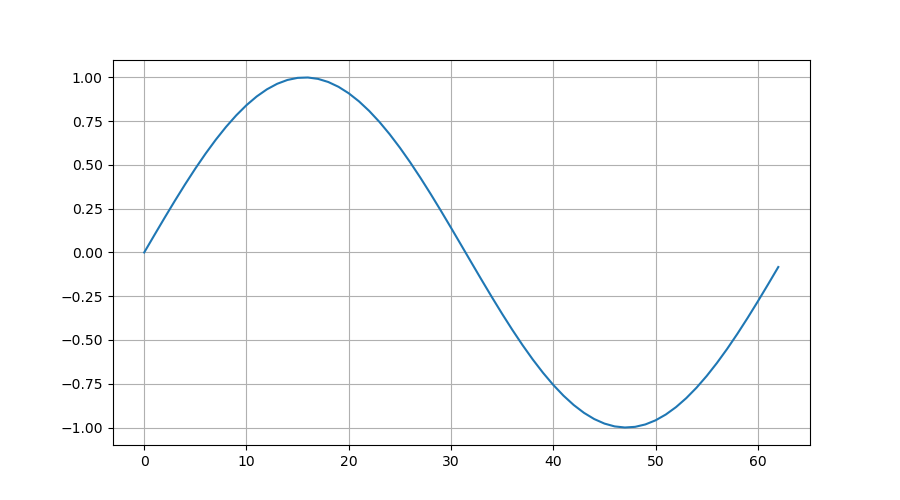

In [75]:
%matplotlib notebook
from matplotlib.pyplot import plot
plt.plot(np.sin(np.arange(0,2*np.pi,0.1)))
plt.show()

For each dataset we'll add yearly, weekly and daily periodicity.

### One hour dataset 

In [78]:
daily_arr = data_1h["Date"].dt.time.unique()
daily_dict = dict(zip(daily_arr, np.sin(np.arange(0,2*np.pi,2*np.pi/len(daily_arr)))))
weekly_arr = data_1h["Date"].apply(lambda x: x.strftime("%a:%H")).unique()
weekly_dict = dict(zip(weekly_arr, np.sin(np.arange(0,2*np.pi,2*np.pi/len(weekly_arr)))))
yearly_arr = data_1h["Date"].apply(lambda x: x.strftime("%j:%H:%a")).unique()
yearly_dict = dict(zip(yearly_arr, np.sin(np.arange(0,2*np.pi,2*np.pi/len(yearly_arr)))))

In [84]:
data_1h["DayTr"] = data_1h.Date.apply(lambda x: daily_dict[x.time()])
data_1h["WeekTr"] = data_1h.Date.apply(lambda x: weekly_dict[x.strftime("%a:%H")])
data_1h["YearTr"] = data_1h.Date.apply(lambda x: yearly_dict[x.strftime("%j:%H:%a")])

### 15 min dataset 

In [97]:
daily_arr = data_15m["Date"].dt.time.unique()
daily_dict = dict(zip(daily_arr, np.sin(np.arange(0,2*np.pi,2*np.pi/len(daily_arr)))))
weekly_arr = data_15m["Date"].apply(lambda x: x.strftime("%a:%H:%M")).unique()
weekly_dict = dict(zip(weekly_arr, np.sin(np.arange(0,2*np.pi,2*np.pi/len(weekly_arr)))))
yearly_arr = data_15m["Date"].apply(lambda x: x.strftime("%j:%H:%M:%a")).unique()
yearly_dict = dict(zip(yearly_arr, np.sin(np.arange(0,2*np.pi,2*np.pi/len(yearly_arr)))))

In [99]:
data_15m["DayTr"] = data_15m.Date.apply(lambda x: daily_dict[x.time()])
data_15m["WeekTr"] = data_15m.Date.apply(lambda x: weekly_dict[x.strftime("%a:%H:%M")])
data_15m["YearTr"] = data_15m.Date.apply(lambda x: yearly_dict[x.strftime("%j:%H:%M:%a")])

### 5 min dataset 

In [101]:
daily_arr = data_5m["Date"].dt.time.unique()
daily_dict = dict(zip(daily_arr, np.sin(np.arange(0,2*np.pi,2*np.pi/len(daily_arr)))))
weekly_arr = data_5m["Date"].apply(lambda x: x.strftime("%a:%H:%M")).unique()
weekly_dict = dict(zip(weekly_arr, np.sin(np.arange(0,2*np.pi,2*np.pi/len(weekly_arr)))))
yearly_arr = data_5m["Date"].apply(lambda x: x.strftime("%j:%H:%M:%a")).unique()
yearly_dict = dict(zip(yearly_arr, np.sin(np.arange(0,2*np.pi,2*np.pi/len(yearly_arr)))))

In [102]:
data_5m["DayTr"] = data_5m.Date.apply(lambda x: daily_dict[x.time()])
data_5m["WeekTr"] = data_5m.Date.apply(lambda x: weekly_dict[x.strftime("%a:%H:%M")])
data_5m["YearTr"] = data_5m.Date.apply(lambda x: yearly_dict[x.strftime("%j:%H:%M:%a")])

### 1 min dataset 

In [103]:
daily_arr = data_1m["Date"].dt.time.unique()
daily_dict = dict(zip(daily_arr, np.sin(np.arange(0,2*np.pi,2*np.pi/len(daily_arr)))))
weekly_arr = data_1m["Date"].apply(lambda x: x.strftime("%a:%H:%M")).unique()
weekly_dict = dict(zip(weekly_arr, np.sin(np.arange(0,2*np.pi,2*np.pi/len(weekly_arr)))))
yearly_arr = data_1m["Date"].apply(lambda x: x.strftime("%j:%H:%M:%a")).unique()
yearly_dict = dict(zip(yearly_arr, np.sin(np.arange(0,2*np.pi,2*np.pi/len(yearly_arr)))))

In [104]:
data_1m["DayTr"] = data_1m.Date.apply(lambda x: daily_dict[x.time()])
data_1m["WeekTr"] = data_1m.Date.apply(lambda x: weekly_dict[x.strftime("%a:%H:%M")])
data_1m["YearTr"] = data_1m.Date.apply(lambda x: yearly_dict[x.strftime("%j:%H:%M:%a")])

# Conclusion 

We've successfully tracked down and corrected mistakes in the datasets. Now we can save them and move on to the next part - creating an environment for the agent.

In [ ]:
data_1h.drop(["TD", "WD"], axis=1, inplace=True)
data_15m.drop(["TD", "WD"], axis=1, inplace=True)
data_5m.drop(["TD", "WD"], axis=1, inplace=True)
data_1m.drop(["TD", "WD"], axis=1, inplace=True)

path_to_1h = data_path + "exp-EURUSD-bars-1h-2016Jan-2020Jan.csv"
path_to_15min = data_path + "exp-EURUSD-bars-m15-2016Jan-2020Jan.csv"
path_to_5min = data_path + "exp-EURUSD-bars-m5-2016Jan-2020Jan.csv"
path_to_1min = data_path + "exp-EURUSD-bars-1m-2016Jan-2020Jan.csv"

data_1h.to_csv(path_to_1h, float_format="%.6f", index=False)
data_15m.to_csv(path_to_15min, float_format="%.6f", index=False)
data_5m.to_csv(path_to_5min, float_format="%.6f", index=False)
data_1m.to_csv(path_to_1min, float_format="%.6f", index=False)